In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import untangle
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = untangle.parse("./tass/tass_2015_tagged/general-tweets-test.xml")

In [3]:
res = []
for t in file.tweets.tweet:
    tmp = {
            'tid': t.tweetid.cdata,
            'text': t.content.cdata,
            'sent': t.sentiments.polarity.value.cdata
          }
    res.append(tmp)
data = pd.DataFrame(res)
data.head()

,sent,text,tid
0,N,"Portada 'Público', viernes. Fabra al banquillo...",142378325086715906
1,NONE,"Grande! RT @veronicacalderon ""El periodista es...",142379080808013825
2,P+,Gonzalo Altozano tras la presentación de su li...,142379173120442368
3,N,"Mañana en Gaceta: TVE, la que pagamos tú y yo,...",142379815708803072
4,NONE,Qué envidia “@mfcastineiras: Pedro mañana x la...,142381190123499520


# Dictionary
Cargamos el diccionario de sentimientos

In [4]:
sentiment = pd.read_csv("./expandedANSW.csv", encoding = "latin1")
sentiment.rename(columns = {'Unnamed: 0': 'word'}, inplace = True)

scaler = MinMaxScaler(feature_range = (-1, 1))
sentiment['Valence'] = scaler.fit_transform(sentiment['Valence'].reshape(-1, 1))
sentiment['Arousal'] = scaler.fit_transform(sentiment['Arousal'].reshape(-1, 1))

sentiment = sentiment.set_index('word')
sentiment.sample(20)

,Arousal,Arousal.std,Frequency,Valence,Valence.std
word,,,,,
favorecera,-0.561038,1.151659,0.315683,-0.401390,1.151659
quebrando,-0.503253,0.865376,0.000000,-0.454401,0.915689
riããn,-0.594370,1.072309,0.000000,-0.788583,0.906953
joeputa,-0.511118,1.111435,0.625913,-0.656322,1.140683
violara,-0.562949,1.115381,0.000000,-0.773852,0.943383
frustrar,-0.463653,1.117503,5.190802,-0.664582,1.061628
inmamable,-0.415107,0.943943,3.967588,-0.877599,0.999469
ladrido,-0.626952,1.001546,1.118518,-0.563977,0.773764
servilismo,-0.482482,1.164265,2.321205,-0.717784,0.891618


# Sentiment analysis

In [5]:
def tokenize(x):
    return x.strip().split(" ")

def valence(x, sentiment):
    return [(word, sentiment.ix[word, 'Valence']) for word in x if word in sentiment.index]

In [6]:
data['list_sentwords'] = data.text.apply(lambda x: list(map(lambda x: x[1], valence(tokenize(x.lower()), sentiment))))
data.head()

,sent,text,tid,list_sentwords
0,N,"Portada 'Público', viernes. Fabra al banquillo...",142378325086715906,"[-0.89718783377, -0.0447587788492]"
1,NONE,"Grande! RT @veronicacalderon ""El periodista es...",142379080808013825,"[-0.186050789576, -0.0737980590249]"
2,P+,Gonzalo Altozano tras la presentación de su li...,142379173120442368,[0.464954774729]
3,N,"Mañana en Gaceta: TVE, la que pagamos tú y yo,...",142379815708803072,[-0.627849859906]
4,NONE,Qué envidia “@mfcastineiras: Pedro mañana x la...,142381190123499520,[-0.133998716773]


In [7]:
data[['n_sent', 'valence_mean']] = data.list_sentwords.apply(lambda x: (len(x), np.mean(x)) if len(x) > 0 else (0, 0))\
                                       .apply(pd.Series)
data.sample(15)

,sent,text,tid,list_sentwords,n_sent,valence_mean
23737,NONE,#Andalucia no es patrimonio de nadie http://t....,161377431373099008,[],0.0,0.000000
54957,NEU,"Como en el País Vasco, en Andalucía sería buen...",184891667969609728,"[0.84352450959, 0.671906229786, -0.23728244628...",5.0,0.018604
42135,N+,Montoro se defiende ante las dudas en Europa: ...,174829496871034882,[],0.0,0.000000
44915,N,El Gobierno alemán quiere que Google pague por...,177292032371470336,"[-0.86756888686, -0.493969393696]",2.0,-0.680769
18927,NONE,Visitan España: el lunes Sarkozy. Martes Van R...,157544934918991872,[],0.0,0.000000
58401,NONE,".@marianorajoy "" las políticas que se han llev...",187496338194305024,"[-0.604924695496, -0.604924695496]",2.0,-0.604925
27404,P,Vamos cerrando un día que nos deja dos citas p...,164126806419578880,"[0.823334123731, -0.86756888686]",2.0,-0.022117
33258,P+,El incremento del número de llegada de visitan...,168023442489229312,[],0.0,0.000000
33777,P+,Con el Club de fans en Logroño http://t.co/Bd9...,168431924795289600,[],0.0,0.000000
37282,NONE,Con María Salom elegida miembro del Comité Eje...,170982931802767360,[-0.392206596534],1.0,-0.392207






Dado que sólo nos interesa N vs. P vs. NEU, podemos colapsar las categorias P+ y N+.

In [8]:
data.sent.unique()

array(['N', 'NONE', 'P+', 'P', 'N+', 'NEU'], dtype=object)

In [9]:
data.ix[data.sent=='N+', 'sent'] = 'N'
data.ix[data.sent=='P+', 'sent'] = 'P'
data.sample(5)

,sent,text,tid,list_sentwords,n_sent,valence_mean
39567,N,. @pedroj_ramirez Mira esto: enfermos de la un...,172608053609373696,[0.232765337347],1.0,0.232765
33270,P,Bueno. Me voy a poner en marcha. Un abrazo gra...,168027512687964160,[0.285265496703],1.0,0.285265
55327,N,Lo molesto de los charlatanes es que no tienen...,185060815521579008,[0.722382194435],1.0,0.722382
27013,NEU,Borrell en @OndaCero_es: A Chacón se le acusa ...,163916904015204352,[],0.0,0.000000
55582,N,A los trolls bloqueo. Que caguen en otra parte...,185258222431637504,[],0.0,0.000000


In [10]:
data.sent.unique()

array(['N', 'NONE', 'P', 'NEU'], dtype=object)

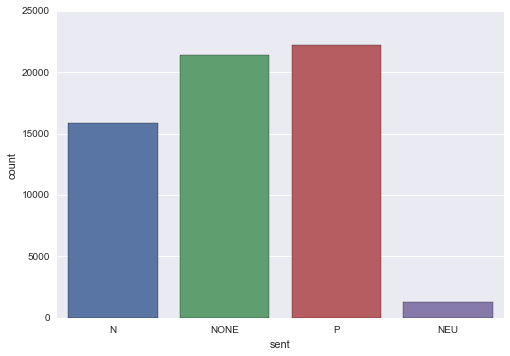

In [11]:
sns.countplot(data['sent']);

Veamos la distribución de valencias en función del sentimiento. Al parecer podríamos diferenciar entre sentimientos __P__ y __N__ usando nada más la media de valencia.

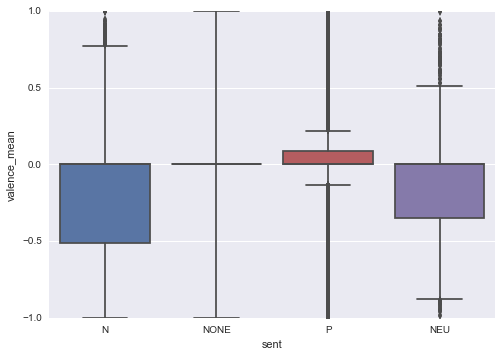

In [12]:
sns.boxplot(x="sent", y="valence_mean", data=data);

## Classifier
Separamos los datos en un simple train/test y comparamos que tan bien predice un arbol de decisión que sólo usa la media de la valencia.

### Data split

In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

tr, ts = train_test_split(data, test_size = 0.25, random_state = 42)

### Baseline
El modelo base es usar la categoria más popular

In [14]:
ts['basemod'] = 'P'
print(classification_report(ts['sent'], ts['basemod']))

/Users/victor/miniconda2/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/victor/miniconda2/envs/py3k/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          N       0.00      0.00      0.00      3967
        NEU       0.00      0.00      0.00       323
       NONE       0.00      0.00      0.00      5372
          P       0.36      1.00      0.53      5538

avg / total       0.13      0.36      0.19     15200



In [15]:
clf = DecisionTreeClassifier()
clf.fit(tr.valence_mean.reshape(len(tr), 1), tr.sent)
preds = clf.predict(ts.valence_mean.reshape(len(ts), 1))

print(classification_report(ts['sent'], preds))

             precision    recall  f1-score   support

          N       0.47      0.30      0.37      3967
        NEU       0.06      0.02      0.03       323
       NONE       0.41      0.75      0.53      5372
          P       0.56      0.28      0.37      5538

avg / total       0.47      0.45      0.42     15200

